**Step 1: Import Necessary Libraries**

In [2]:
# Install required packages
!pip install seaborn scikit-learn xgboost

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


**Step 2: Load the EEG Brainwave Dataset**

In [3]:
file_path = '/content/emotions.csv'  # Update path as needed
eeg_data = pd.read_csv(file_path)
print("Step 2 Complete: Dataset Loaded")


Step 2 Complete: Dataset Loaded


**Step 3: Explore and Inspect the Dataset**

In [4]:
# Display first few rows
print("Dataset Preview:")
print(eeg_data.head())

# Check for missing values
print("\nMissing Values Check:")
print(eeg_data.isnull().sum())
print("Step 3 Complete: Dataset Inspected")


Dataset Preview:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745

**Step 4: Visualize the Dataset**


Dataset Description:
        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean      0.025378     0.052282     0.301655     0.036793     0.083567  ...   
std      17.981796     8.509174    68.098894    17.010031    18.935378  ..

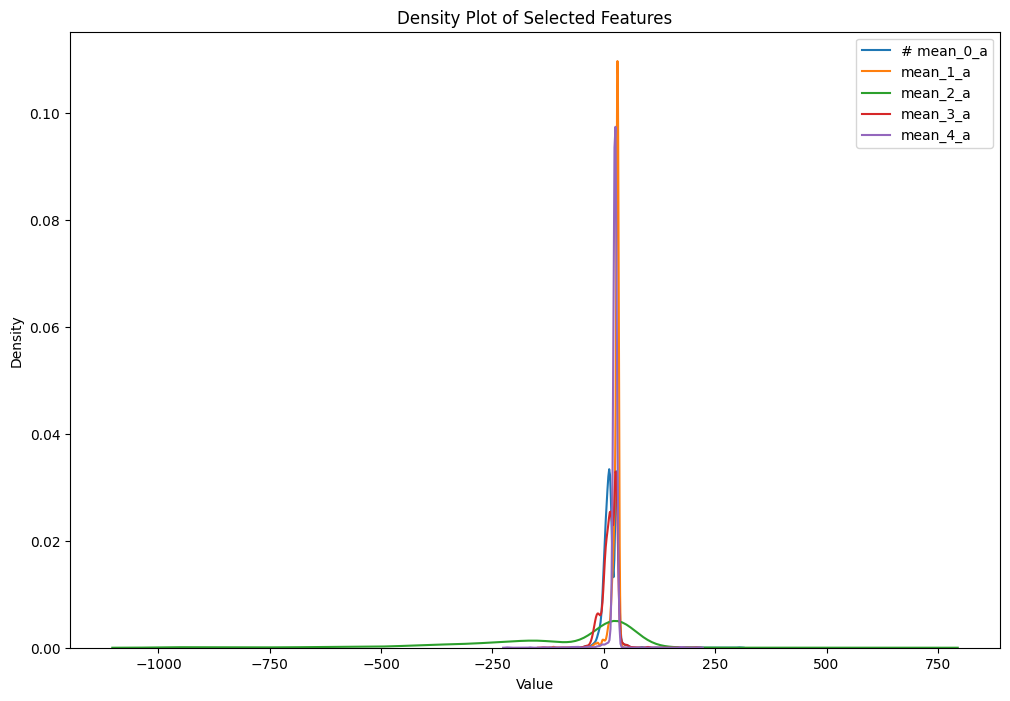

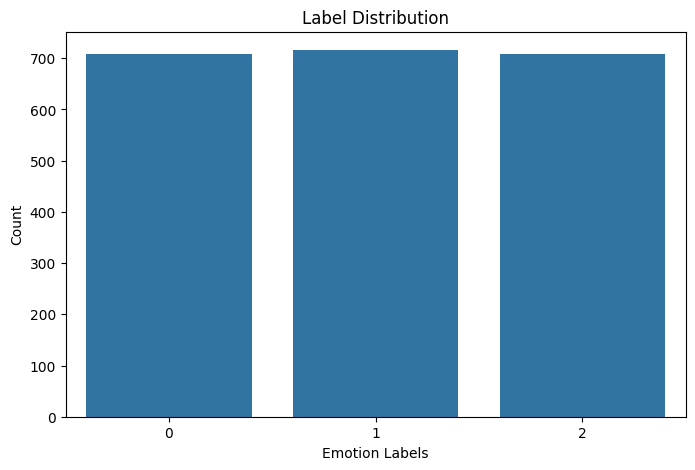

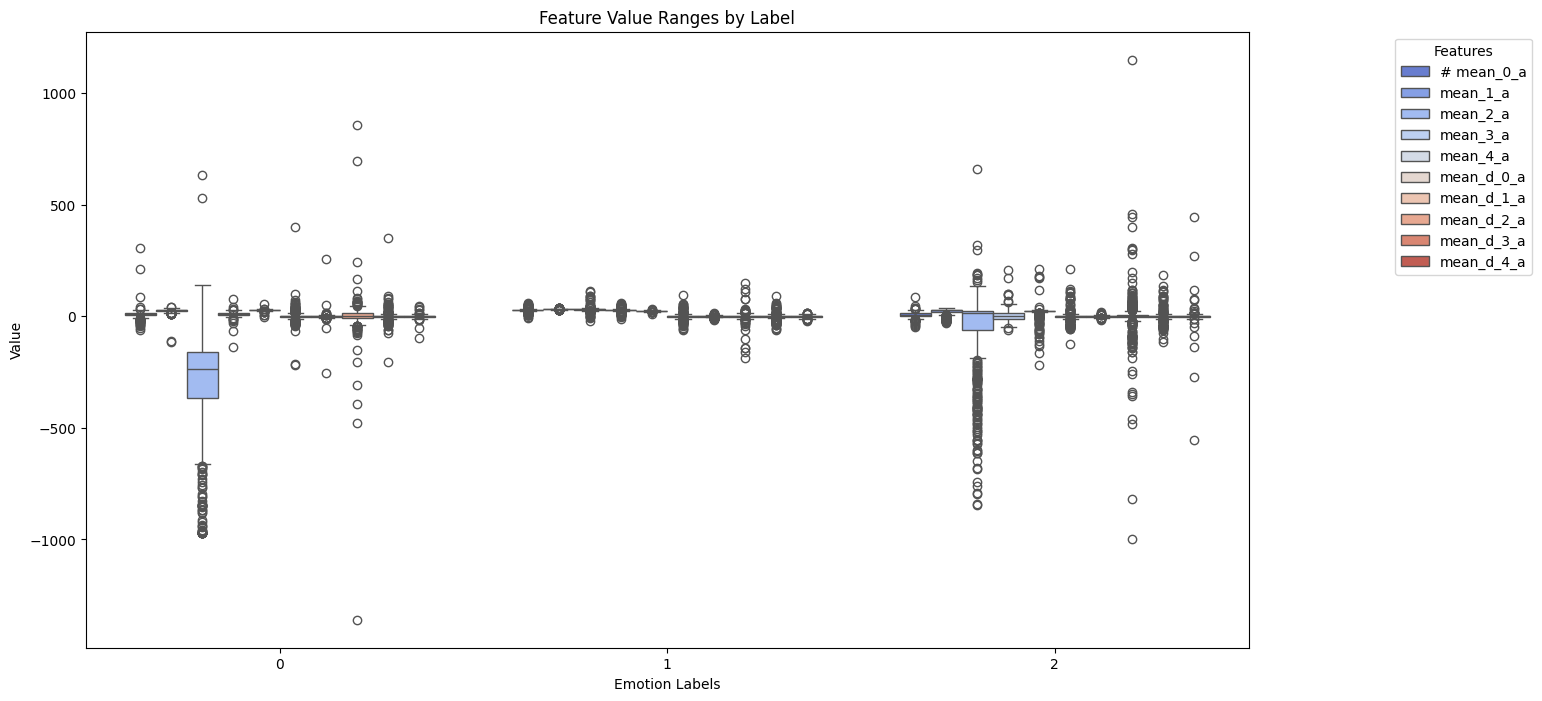

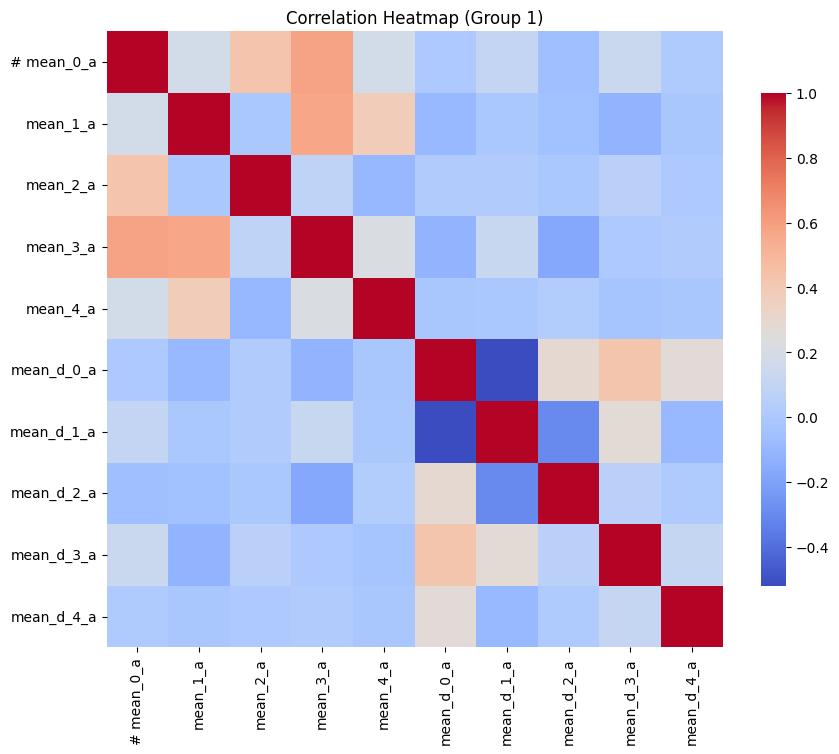

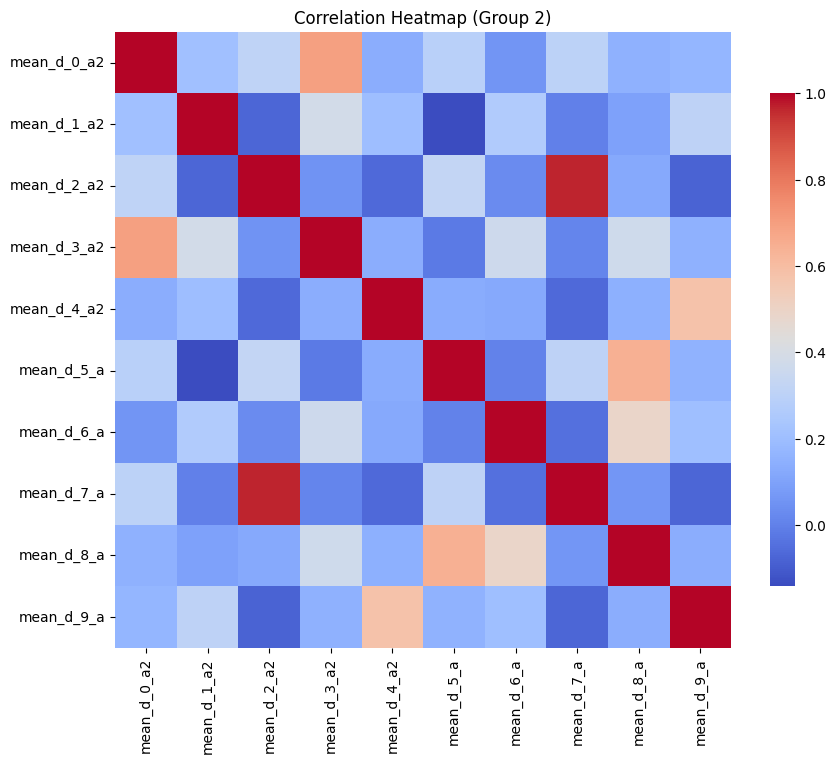

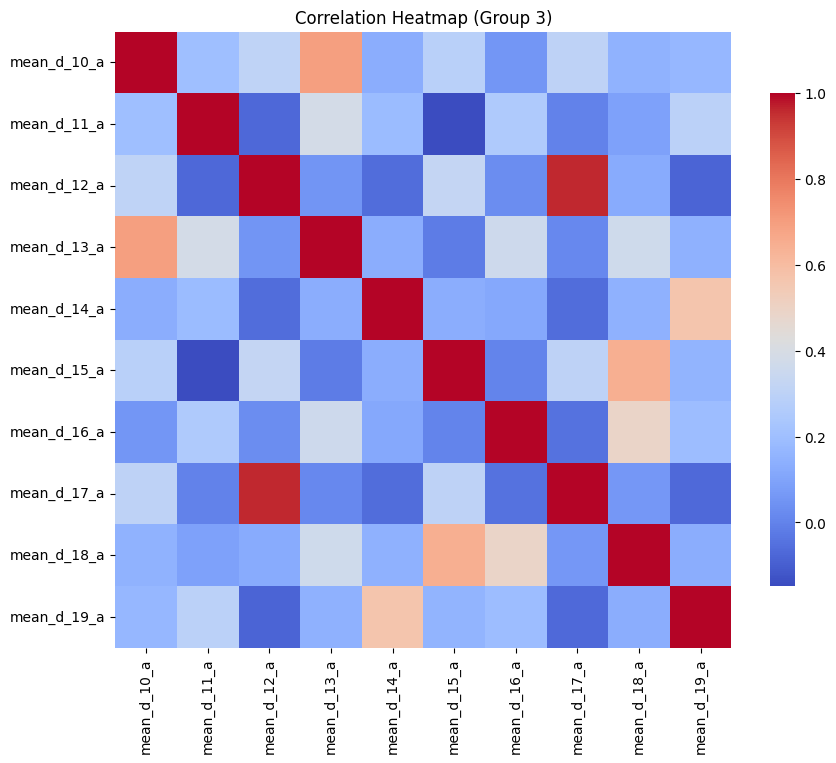

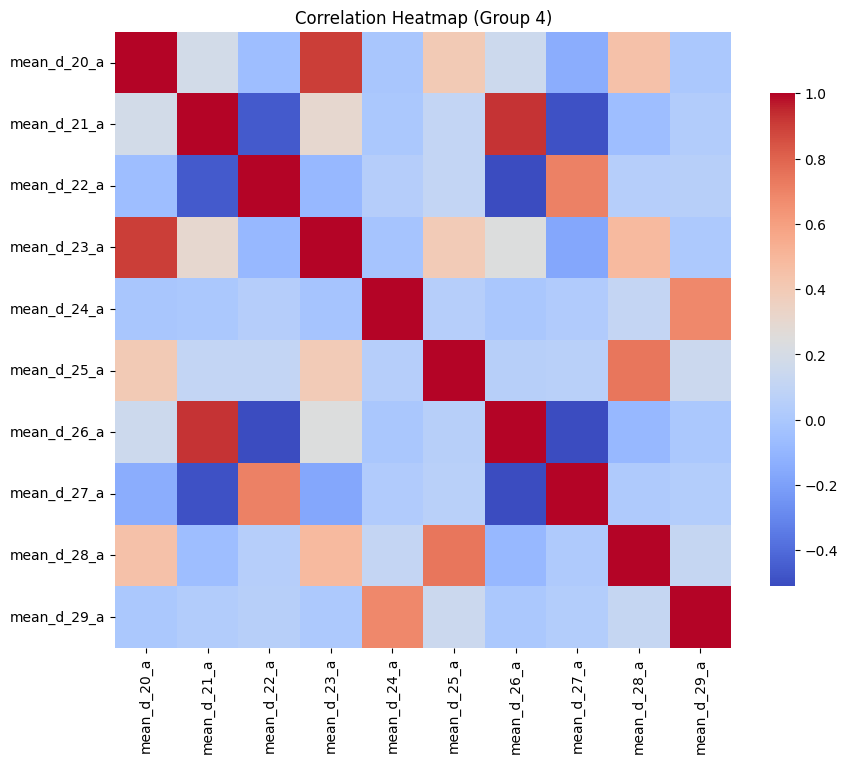

Step 4 Complete: Dataset Visualized


In [12]:
# Initialize the label encoder (ensure this is done before using it)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
eeg_data['label'] = label_encoder.fit_transform(eeg_data['label'])

# Display statistical summary
print("\nDataset Description:")
print(eeg_data.describe())

# Density plot of selected features
selected_features = eeg_data.columns[:5]  # Select a subset of features for visualization
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(eeg_data[feature], label=feature)
plt.title("Density Plot of Selected Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Count plot for target labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=eeg_data)
plt.title("Label Distribution")
plt.xlabel("Emotion Labels")
plt.ylabel("Count")
plt.xticks(ticks=range(len(eeg_data['label'].unique())), labels=label_encoder.classes_)
plt.show()

# Boxplot for feature ranges grouped by label
selected_features = eeg_data.columns[:10]  # Select a manageable number of features for boxplot
melted_data = pd.melt(eeg_data[selected_features].join(eeg_data['label']), id_vars='label', var_name='Feature', value_name='Value')
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_data, x='label', y='Value', hue='Feature', palette='coolwarm')
plt.title("Feature Value Ranges by Label")
plt.xlabel("Emotion Labels")
plt.ylabel("Value")
plt.legend(loc='upper right', title="Features", bbox_to_anchor=(1.25, 1))
plt.show()

# Correlation heatmaps divided into smaller groups for better visualization
feature_groups = [eeg_data.columns[:10], eeg_data.columns[10:20], eeg_data.columns[20:30], eeg_data.columns[30:40]]  # Adjust group size as needed
for idx, group in enumerate(feature_groups):
    plt.figure(figsize=(10, 8))
    correlation_matrix = eeg_data[group].corr()
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
    plt.title(f"Correlation Heatmap (Group {idx + 1})")
    plt.show()

print("Step 4 Complete: Dataset Visualized")


**Step 5: Encode Target Labels**

In [13]:
label_encoder = LabelEncoder()
eeg_data['label'] = label_encoder.fit_transform(eeg_data['label'])
print("Step 5 Complete: Labels Encoded")


Step 5 Complete: Labels Encoded


**Step 6: Split Features and Target Variables**

In [14]:
# Separate features and target labels
X = eeg_data.drop('label', axis=1)  # Features
y = eeg_data['label']  # Target labels
print("Step 6 Complete: Features and Targets Split")


Step 6 Complete: Features and Targets Split


**Step 7: Normalize Features**

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Step 7 Complete: Features Normalized")


Step 7 Complete: Features Normalized


**Step 8: Split the Dataset**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Step 8 Complete: Dataset Split")


Step 8 Complete: Dataset Split


**Step 9: Train Machine Learning Models**

Training Support Vector Machine...

--- Support Vector Machine Performance ---
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       143
           1       0.99      0.99      0.99       148
           2       0.97      0.96      0.97       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



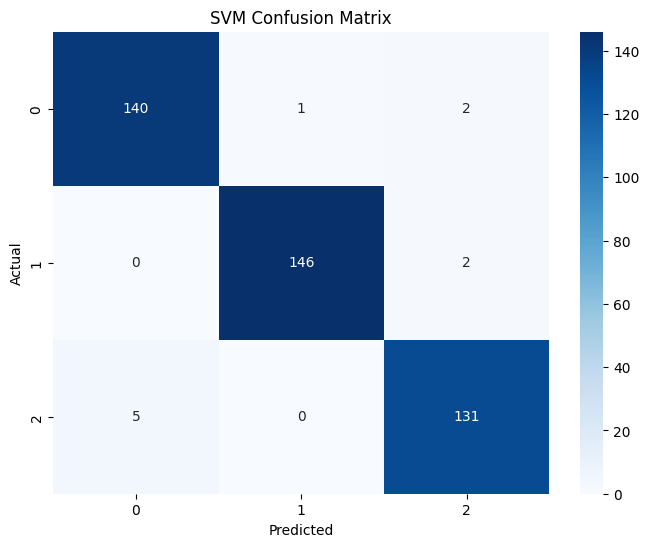

Training Random Forest...

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      1.00      1.00       148
           2       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



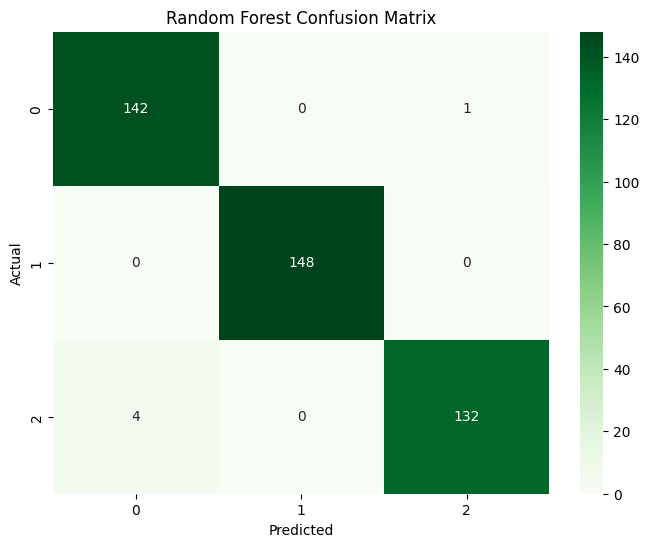

Training k-Nearest Neighbors...

--- k-Nearest Neighbors Performance ---
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       143
           1       0.95      0.98      0.97       148
           2       0.97      0.82      0.88       136

    accuracy                           0.93       427
   macro avg       0.94      0.93      0.93       427
weighted avg       0.94      0.93      0.93       427



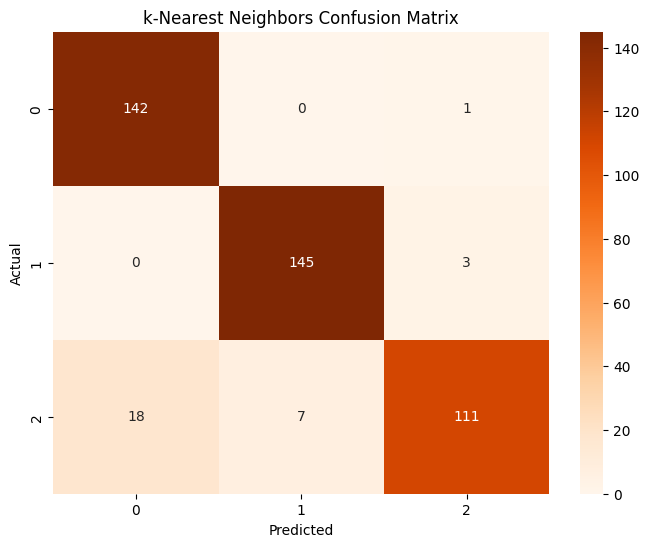

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       143
           1       1.00      0.99      1.00       148
           2       0.97      0.95      0.96       136

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



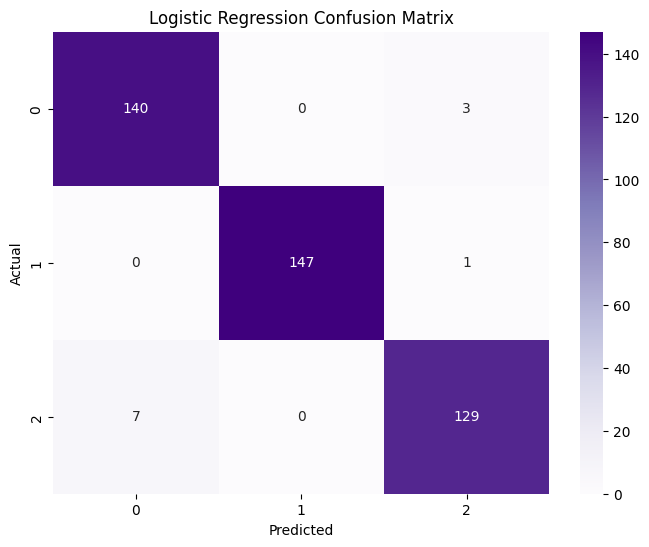

Training Gradient Boosting...

--- Gradient Boosting Performance ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      1.00      1.00       148
           2       1.00      0.99      1.00       136

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



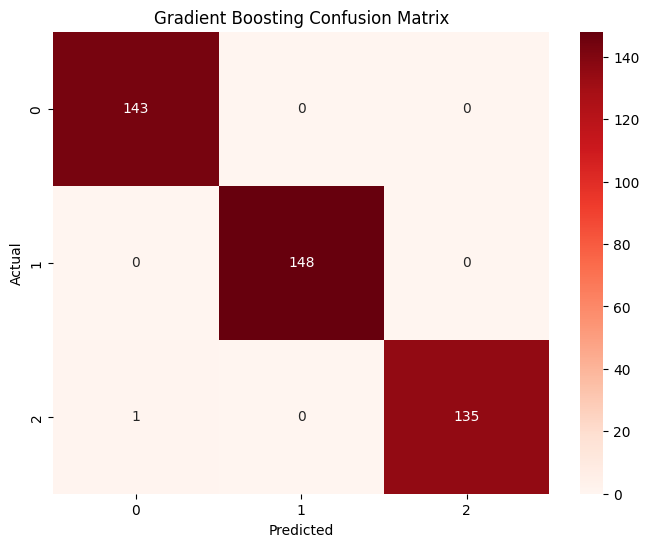

Training XGBoost...

--- XGBoost Performance ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      1.00      1.00       148
           2       1.00      0.99      1.00       136

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



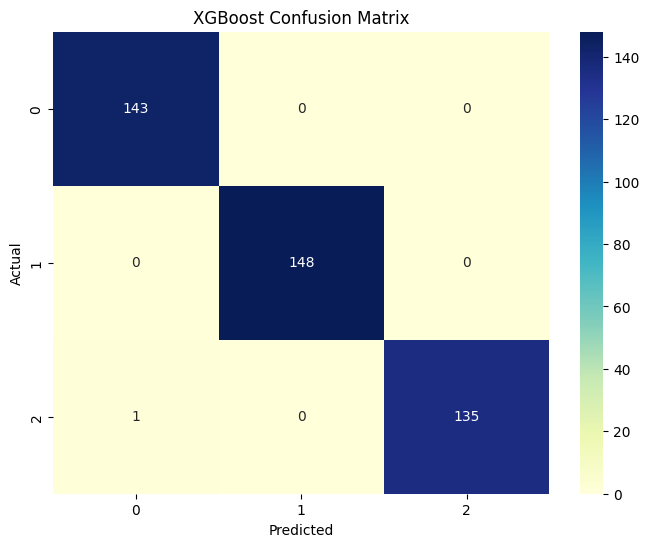

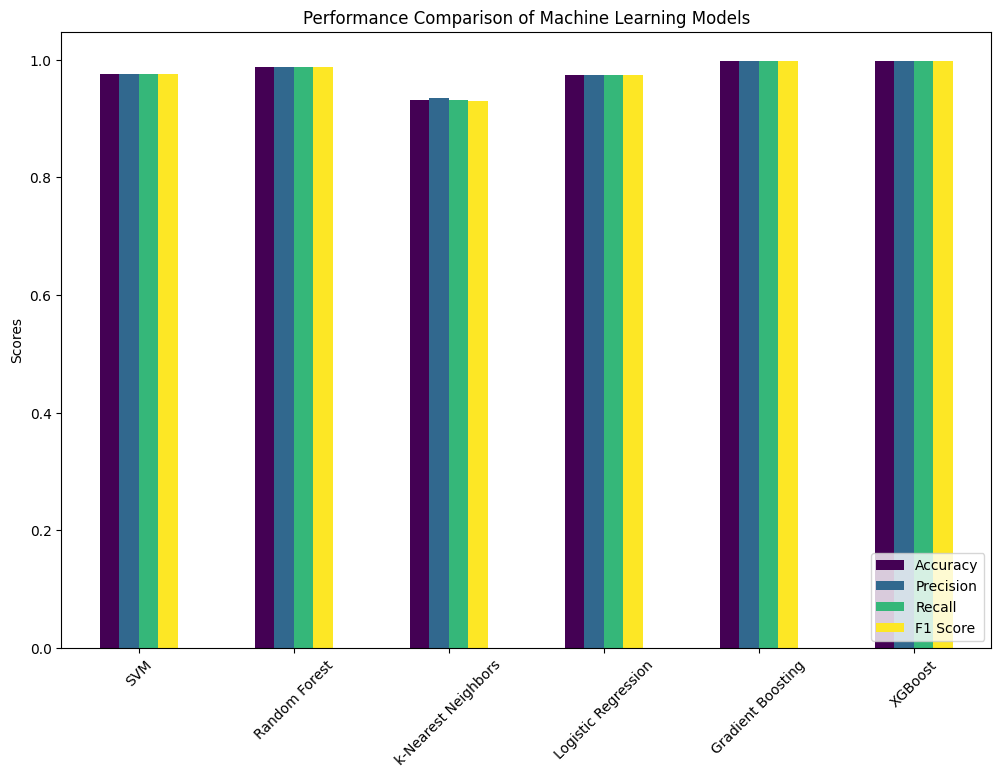

Step 9 Complete: Machine Learning Models Trained, Evaluated, and Compared


In [18]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize machine learning models
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize dictionary for performance comparison
performance_comparison = {}

# Train and evaluate SVM
print("Training Support Vector Machine...")
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
performance_comparison['SVM'] = {
    'Accuracy': accuracy_score(y_test, svm_predictions),
    'Precision': precision_score(y_test, svm_predictions, average='weighted'),
    'Recall': recall_score(y_test, svm_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, svm_predictions, average='weighted')
}
print("\n--- Support Vector Machine Performance ---")
print(classification_report(y_test, svm_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate Random Forest
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
performance_comparison['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_predictions),
    'Precision': precision_score(y_test, rf_predictions, average='weighted'),
    'Recall': recall_score(y_test, rf_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, rf_predictions, average='weighted')
}
print("\n--- Random Forest Performance ---")
print(classification_report(y_test, rf_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate k-Nearest Neighbors
print("Training k-Nearest Neighbors...")
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
performance_comparison['k-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, knn_predictions),
    'Precision': precision_score(y_test, knn_predictions, average='weighted'),
    'Recall': recall_score(y_test, knn_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, knn_predictions, average='weighted')
}
print("\n--- k-Nearest Neighbors Performance ---")
print(classification_report(y_test, knn_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("k-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate Logistic Regression
print("Training Logistic Regression...")
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
performance_comparison['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_predictions),
    'Precision': precision_score(y_test, lr_predictions, average='weighted'),
    'Recall': recall_score(y_test, lr_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, lr_predictions, average='weighted')
}
print("\n--- Logistic Regression Performance ---")
print(classification_report(y_test, lr_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate Gradient Boosting
print("Training Gradient Boosting...")
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
performance_comparison['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, gb_predictions),
    'Precision': precision_score(y_test, gb_predictions, average='weighted'),
    'Recall': recall_score(y_test, gb_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, gb_predictions, average='weighted')
}
print("\n--- Gradient Boosting Performance ---")
print(classification_report(y_test, gb_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate XGBoost
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
performance_comparison['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, xgb_predictions),
    'Precision': precision_score(y_test, xgb_predictions, average='weighted'),
    'Recall': recall_score(y_test, xgb_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, xgb_predictions, average='weighted')
}
print("\n--- XGBoost Performance ---")
print(classification_report(y_test, xgb_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='YlGnBu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize performance comparison
performance_df = pd.DataFrame(performance_comparison).T
performance_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Performance Comparison of Machine Learning Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

print("Step 9 Complete: Machine Learning Models Trained, Evaluated, and Compared")


**Step 10: Train Deep Learning Models**


Training CNN Model...
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.6925 - loss: 1.8816 - val_accuracy: 0.9110 - val_loss: 0.2530
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8903 - loss: 0.3002 - val_accuracy: 0.9251 - val_loss: 0.1775
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8985 - loss: 0.2697 - val_accuracy: 0.9321 - val_loss: 0.1809
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9038 - loss: 0.2143 - val_accuracy: 0.9438 - val_loss: 0.1396
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8830 - loss: 0.2422 - val_accuracy: 0.9438 - val_loss: 0.1508
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9013 - loss: 0.2323 - val_accuracy: 0.9461 - val_loss: 0.1268
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9075 - loss: 0.2044 - val_accuracy: 0.9391 - val_loss: 0.1230
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9057 - loss: 0.1948 -

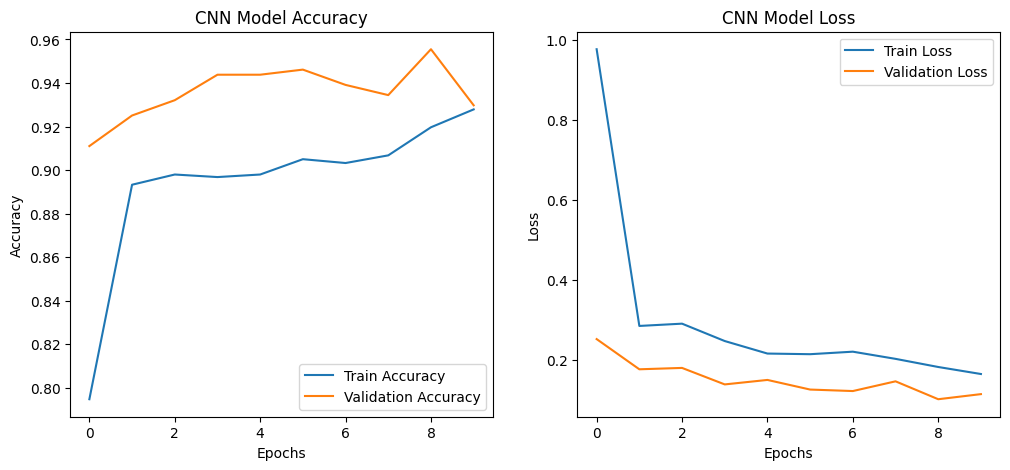


Training LSTM Model...
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5387 - loss: 1.0534 - val_accuracy: 0.6651 - val_loss: 0.7561
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.6550 - loss: 0.7407 - val_accuracy: 0.8689 - val_loss: 0.5104
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7948 - loss: 0.6105 - val_accuracy: 0.8431 - val_loss: 0.4920
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8368 - loss: 0.4809 - val_accuracy: 0.8689 - val_loss: 0.4545
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8554 - loss: 0.4728 - val_accuracy: 0.8735 - val_loss: 0.4140


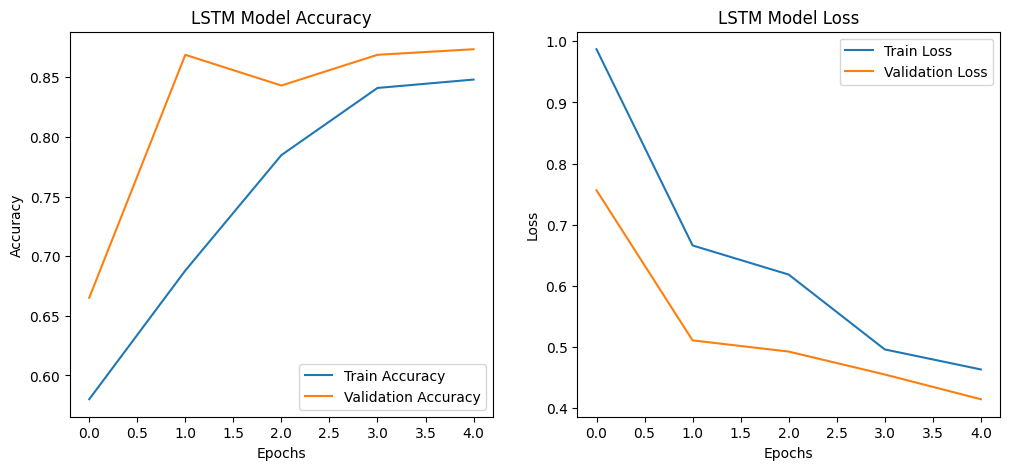


Training Hybrid CNN-LSTM Model...
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 813ms/step - accuracy: 0.4039 - loss: 1.0599 - val_accuracy: 0.7213 - val_loss: 0.9542
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 724ms/step - accuracy: 0.6946 - loss: 0.8806 - val_accuracy: 0.8618 - val_loss: 0.5974
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 786ms/step - accuracy: 0.8117 - loss: 0.5855 - val_accuracy: 0.8735 - val_loss: 0.4714
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 777ms/step - accuracy: 0.8483 - loss: 0.4943 - val_accuracy: 0.8618 - val_loss: 0.4354
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 741ms/step - accuracy: 0.8570 - loss: 0.4156 - val_accuracy: 0.8852 - val_loss: 0.3637


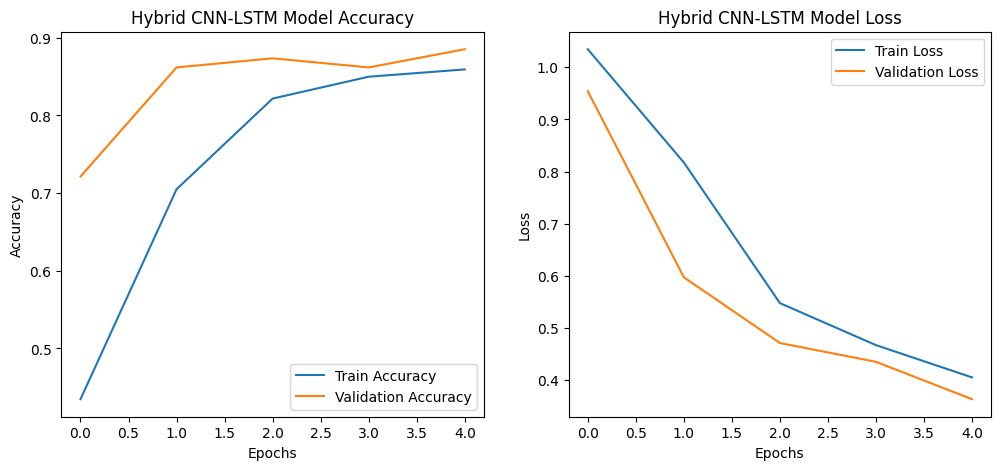

Step 10 Complete: Deep Learning Models Trained and Evaluated


In [20]:
# Import necessary libraries for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert labels to categorical for DL models
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# CNN Model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate CNN model
print("\nTraining CNN Model...")
cnn_model = build_cnn_model((X_train.shape[1], 1))
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_cat,
                            validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_cat),
                            epochs=10, batch_size=32, verbose=1)

# Visualize CNN performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(32, return_sequences=True, input_shape=input_shape),
        LSTM(32),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate LSTM model
print("\nTraining LSTM Model...")
lstm_model = build_lstm_model((X_train.shape[1], 1))
lstm_history = lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_cat,
                              validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_cat),
                              epochs=5, batch_size=64, verbose=1)

# Visualize LSTM performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hybrid CNN-LSTM Model
def build_hybrid_model(input_shape):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(32),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate Hybrid CNN-LSTM model
print("\nTraining Hybrid CNN-LSTM Model...")
hybrid_model = build_hybrid_model((X_train.shape[1], 1))
hybrid_history = hybrid_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train_cat,
                                  validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test_cat),
                                  epochs=5, batch_size=64, verbose=1)

# Visualize Hybrid CNN-LSTM performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hybrid_history.history['accuracy'], label='Train Accuracy')
plt.plot(hybrid_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Hybrid CNN-LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hybrid_history.history['loss'], label='Train Loss')
plt.plot(hybrid_history.history['val_loss'], label='Validation Loss')
plt.title('Hybrid CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Step 10 Complete: Deep Learning Models Trained and Evaluated")

**Testing best Models**

Testing Gradient Boosting Model on Provided Dataset...

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      1.00      1.00       148
           2       1.00      0.99      1.00       136

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



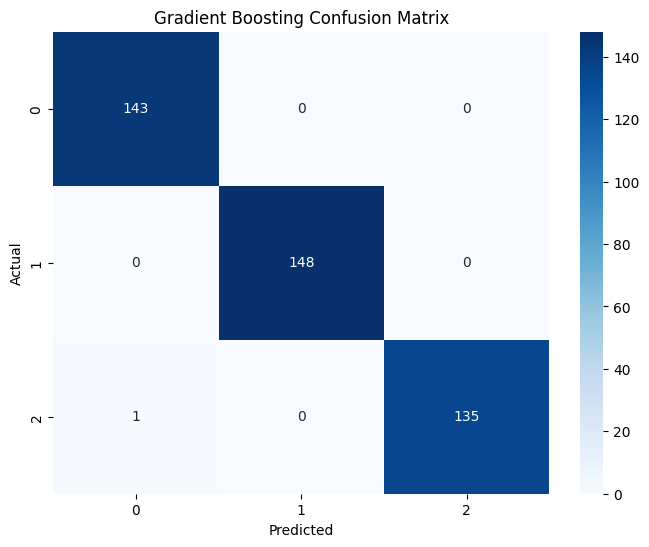

Testing XGBoost Model on Provided Dataset...

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      1.00      1.00       148
           2       1.00      0.99      1.00       136

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



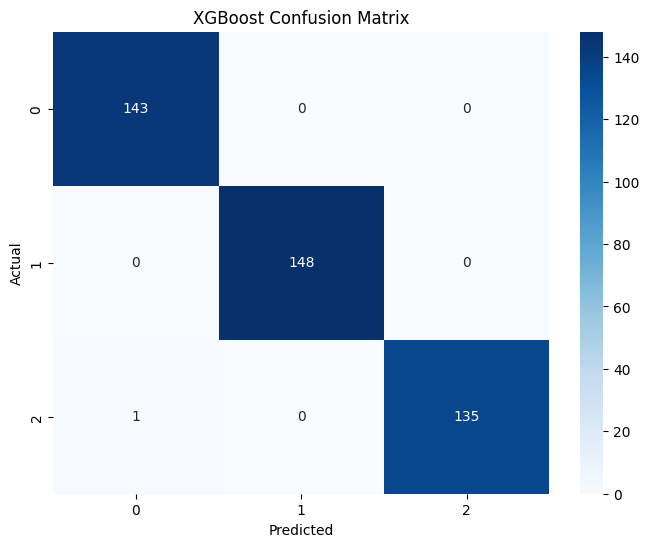


Comparing Gradient Boosting and XGBoost Performance...


<Figure size 1000x600 with 0 Axes>

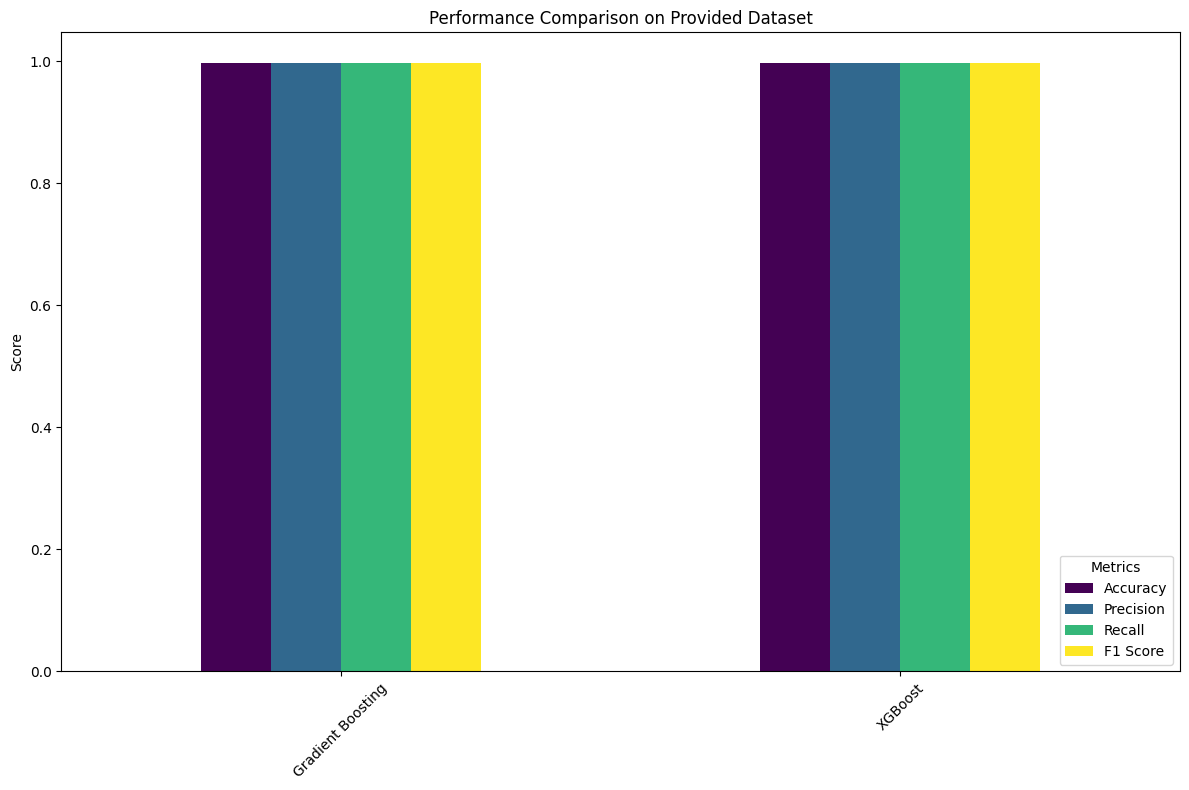

In [30]:
# Import necessary libraries for testing
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the dataset is already loaded and prepared
# Assuming `X_test` and `y_test` are already defined as part of the loaded dataset

# Test Gradient Boosting model
print("Testing Gradient Boosting Model on Provided Dataset...")
gb_predictions = gb_model.predict(X_test)

# Gradient Boosting performance metrics
print("\nGradient Boosting Performance:")
print(classification_report(y_test, gb_predictions))

# Gradient Boosting confusion matrix
plt.figure(figsize=(8, 6))
gb_cm = confusion_matrix(y_test, gb_predictions)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test XGBoost model
print("Testing XGBoost Model on Provided Dataset...")
xgb_predictions = xgb_model.predict(X_test)

# XGBoost performance metrics
print("\nXGBoost Performance:")
print(classification_report(y_test, xgb_predictions))

# XGBoost confusion matrix
plt.figure(figsize=(8, 6))
xgb_cm = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare Gradient Boosting and XGBoost performance
print("\nComparing Gradient Boosting and XGBoost Performance...")
comparison_metrics = {
    'Gradient Boosting': {
        'Accuracy': accuracy_score(y_test, gb_predictions),
        'Precision': precision_score(y_test, gb_predictions, average='weighted'),
        'Recall': recall_score(y_test, gb_predictions, average='weighted'),
        'F1 Score': f1_score(y_test, gb_predictions, average='weighted')
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, xgb_predictions),
        'Precision': precision_score(y_test, xgb_predictions, average='weighted'),
        'Recall': recall_score(y_test, xgb_predictions, average='weighted'),
        'F1 Score': f1_score(y_test, xgb_predictions, average='weighted')
    }
}
comparison_df = pd.DataFrame(comparison_metrics).T

# Visualization of comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Performance Comparison on Provided Dataset')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='lower right')
plt.tight_layout()
plt.show()
